### aim: what does the iron cycle look like in medusa and planktom?

### date: 

In [2]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')


In [3]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [4]:
import numpy as np
from cmocean import cm
import cartopy as cp
import cartopy.crs as ccrs
import netCDF4 as nc
import matplotlib.pyplot as plt
import xarray as xr
import sys
sys.path.append('/gpfs/home/mep22dku/scratch/SOZONE')
#list of models
sys.path.append('/gpfs/home/mep22dku/scratch/SOZONE/UTILS')
import lom
import utils as ut

%matplotlib inline
import warnings
from datetime import datetime
warnings.filterwarnings('ignore')
import cartopy.feature as cfeature
from importlib import reload
import matplotlib.path as mpath
import glob
import pickle
import pandas as pd
import seawater
import time
plt.rcParams.update({'font.size': 12})
font = {'family' : 'normal',
'weight' : 'normal',
'size'   : 12}

plt.rc('font', **font)

In [5]:
def make_yearlist(yrst, yrend, dtype, tr, baseDir = '/gpfs/data/greenocean/software/runs'):
    yrs = np.arange(yrst,yrend+1,1)
    ylist = []
    for i in range(0,len(yrs)):
        ty = f'{baseDir}/{tr}/ORCA2_1m_{yrs[i]}*{dtype}*.nc'
        t2 = glob.glob(ty)
        #print(t2)
        ylist.append(t2[0])
    return ylist

def make_yearlist_med(yrst, yrend, baseDir = '/gpfs/data/greenocean/software/resources/MEDUSA/PROC2/'):
    yrs = np.arange(yrst,yrend+1,1)
    ylist = []
    for i in range(0,len(yrs)):
        ty = f'{baseDir}/medusa_bc370_1y_{yrs[i]}_ptrc-T-FERPHD.nc'
        t2 = glob.glob(ty)
        #print(t2)
        ylist.append(t2[0])
    return ylist


RW_CO2a = xr.open_mfdataset(make_yearlist(1950, 1951, 'ptrc', 'TOM12_RW_CO2a'))
MED = xr.open_mfdataset(make_yearlist_med(1950, 1951))


In [6]:
RW_CO2a

<xarray.Dataset>
Dimensions:               (axis_nbounds: 2, deptht: 31, time_counter: 24, x: 182, y: 149)
Coordinates:
    nav_lat               (y, x) float32 dask.array<chunksize=(149, 182), meta=np.ndarray>
    nav_lon               (y, x) float32 dask.array<chunksize=(149, 182), meta=np.ndarray>
  * deptht                (deptht) float32 5.0 15.0 25.0 ... 4.75e+03 5.25e+03
    time_centered         (time_counter) object dask.array<chunksize=(12,), meta=np.ndarray>
  * time_counter          (time_counter) object 1950-01-16 12:00:00 ... 1951-...
Dimensions without coordinates: axis_nbounds, x, y
Data variables: (12/34)
    deptht_bounds         (time_counter, deptht, axis_nbounds) float32 dask.array<chunksize=(12, 31, 2), meta=np.ndarray>
    Alkalini              (time_counter, deptht, y, x) float32 dask.array<chunksize=(12, 31, 149, 182), meta=np.ndarray>
    time_centered_bounds  (time_counter, axis_nbounds) object dask.array<chunksize=(12, 2), meta=np.ndarray>
    time_counter_bounds   (time_counter, axis_nbounds) object dask.array<chunksize=(12, 2), meta=np.ndarray>
    O2                    (time_counter, deptht, y, x) float32 dask.array<chunksize=(12, 31, 149, 182), meta=np.ndarray>
    DIC                   (time_counter, deptht, y, x) float32 dask.array<chunksize=(12, 31, 149, 182), meta=np.ndarray>
    ...                    ...
    BSi                   (time_counter, deptht, y, x) float32 dask.array<chunksize=(12, 31, 149, 182), meta=np.ndarray>
    GON                   (time_counter, deptht, y, x) float32 dask.array<chunksize=(12, 31, 149, 182), meta=np.ndarray>
    C11                   (time_counter, deptht, y, x) float32 dask.array<chunksize=(12, 31, 149, 182), meta=np.ndarray>
    B14B                  (time_counter, deptht, y, x) float32 dask.array<chunksize=(12, 31, 149, 182), meta=np.ndarray>
    C14B                  (time_counter, deptht, y, x) float32 dask.array<chunksize=(12, 31, 149, 182), meta=np.ndarray>
    D14B                  (time_counter, deptht, y, x) float32 dask.array<chunksize=(12, 31, 149, 182), meta=np.ndarray>
Attributes:
    name:         ORCA2_1m_19500101_19501231
    description:  planktom sms variables
    title:        planktom sms variables
    Conventions:  CF-1.5
    production:   An IPSL model
    timeStamp:    2024-Feb-26 23:05:31 GMT

In [7]:
RW_CO2_surf = RW_CO2a.Fer.isel(deptht = 0).mean(dim = 'time_counter')*1e9
RW_CO2_surf = RW_CO2_surf.values
RW_CO2_surf[RW_CO2_surf == 0] = np.nan

RW_CO2_1000 = RW_CO2a.Fer.isel(deptht = 21).mean(dim = 'time_counter')*1e9
RW_CO2_1000 = RW_CO2_1000.values
RW_CO2_1000[RW_CO2_1000 == 0] = np.nan

RW_CO2_2000 = RW_CO2a.Fer.isel(deptht = 24).mean(dim = 'time_counter')*1e9
RW_CO2_2000 = RW_CO2_2000.values
RW_CO2_2000[RW_CO2_2000 == 0] = np.nan

In [8]:
MED_surf = MED.FER.isel(deptht = 0).mean(dim = 'time_counter')*1e3
MED_surf = MED_surf.values
MED_surf[MED_surf == 0] = np.nan

MED_1000 = MED.FER.isel(deptht = 46).mean(dim = 'time_counter')*1e3
MED_1000 = MED_1000.values
MED_1000[MED_1000 == 0] = np.nan

MED_2000 = MED.FER.isel(deptht = 53).mean(dim = 'time_counter')*1e3
MED_2000 = MED_2000.values
MED_2000[MED_2000 == 0] = np.nan

Text(0.5, 1.0, 'MEDa ~2000m iron \n 1950-1951, nmol/L')

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


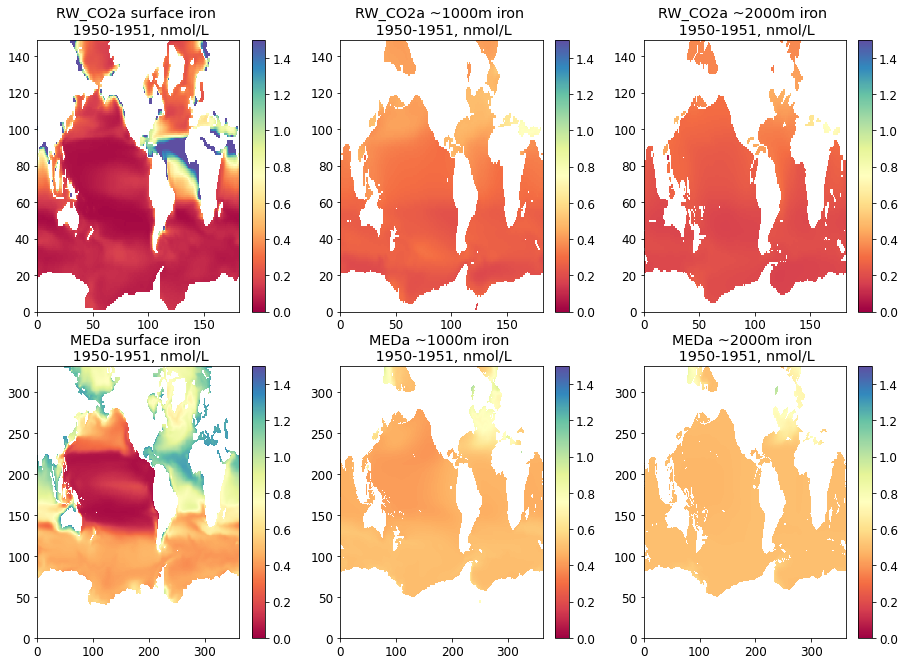

In [9]:
fact = 1.1
fig, axs = plt.subplots(2,3, figsize=(14*fact, 10*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()

q = axs[0].pcolormesh(RW_CO2_surf, cmap = 'Spectral',\
                     vmin = 0, vmax = 1.5)
plt.colorbar(q, ax = axs[0])
axs[0].set_title('RW_CO2a surface iron \n 1950-1951, nmol/L')

q = axs[1].pcolormesh(RW_CO2_1000, cmap = 'Spectral',\
                     vmin = 0, vmax = 1.5)
plt.colorbar(q, ax = axs[1])
axs[1].set_title('RW_CO2a ~1000m iron \n 1950-1951, nmol/L')

q = axs[2].pcolormesh(RW_CO2_2000, cmap = 'Spectral',\
                     vmin = 0, vmax = 1.5)
plt.colorbar(q, ax = axs[2])
axs[2].set_title('RW_CO2a ~2000m iron \n 1950-1951, nmol/L')

q = axs[3].pcolormesh(MED_surf, cmap = 'Spectral',\
                     vmin = 0, vmax = 1.5)
plt.colorbar(q, ax = axs[3])
axs[3].set_title('MEDa surface iron \n 1950-1951, nmol/L')

q = axs[4].pcolormesh(MED_1000, cmap = 'Spectral',\
                     vmin = 0, vmax = 1.5)
plt.colorbar(q, ax = axs[4])
axs[4].set_title('MEDa ~1000m iron \n 1950-1951, nmol/L')

q = axs[5].pcolormesh(MED_2000, cmap = 'Spectral',\
                     vmin = 0, vmax = 1.5)
plt.colorbar(q, ax = axs[5])
axs[5].set_title('MEDa ~2000m iron \n 1950-1951, nmol/L')

In [10]:
tmask = xr.open_dataset(f'/gpfs/data/greenocean/software/resources/MEDUSA/mesh_mask.nc')
tmask_surf = tmask.tmask[0,0,:,:] * tmask.e1t[0,:,:] * tmask.e2t[0,:,:]

med_pd = MED.FER.groupby('time_counter.month').mean().\
isel(y=slice(0,114)).weighted(tmask_surf.isel(y=slice(0,114))).mean(dim = ['x','y']).values * 1e3


tmesh = xr.open_dataset('/gpfs/data/greenocean/software/resources/regrid/mesh_mask3_6.nc')
csize = tmesh.tmask[0,0,:,:] * tmesh.e1t[0,:,:] * tmesh.e2t[0,:,:]

RW_pd = RW_CO2a.Fer.groupby('time_counter.month').mean().\
isel(y=slice(0,37)).weighted(csize.isel(y=slice(0,37))).mean(dim = ['x','y']).values * 1e9


In [11]:
RW_pd_anmean = np.nanmean(RW_pd, axis = 0)
med_pd_anmean = np.nanmean(med_pd, axis = 0)

In [12]:
RW_200m = (RW_pd_anmean[16]-RW_pd_anmean[0])/(RW_CO2a.deptht[16].values - RW_CO2a.deptht[0].values)
MED_200m = (med_pd_anmean[30]-med_pd_anmean[0])/(MED.deptht[30].values - MED.deptht[0].values)


MED_1000_min0 = med_pd_anmean[46]-med_pd_anmean[0]
MED_2000_min0 = med_pd_anmean[53]-med_pd_anmean[0]

RW_1000_min0 = RW_pd_anmean[21]-RW_pd_anmean[0]
RW_2000_min0 = RW_pd_anmean[24]-RW_pd_anmean[0]

In [13]:
print(RW_pd_anmean[16])

0.27033953911914027


In [14]:
print(f'surface conc. (nmol/L) RW_CO2a {RW_pd_anmean[0]}, MEDUSA {med_pd_anmean[0]}')
print(f'200m rough gradients (nmol/L/m) RW_CO2a {RW_200m}, MEDUSA {MED_200m}')
print(f'diff between 1000ish and surface RW_CO2a {RW_1000_min0}, MEDUSA {MED_1000_min0}')
print(f'diff between 2000ish and surface RW_CO2a {RW_2000_min0}, MEDUSA {MED_2000_min0}')

surface conc. (nmol/L) RW_CO2a 0.10011405669817854, MEDUSA 0.4460313317287947
200m rough gradients (nmol/L/m) RW_CO2a 0.0008042858837255584, MEDUSA 0.0005071572956920386
diff between 1000ish and surface RW_CO2a 0.13049954662662122, MEDUSA 0.05681226395391348
diff between 2000ish and surface RW_CO2a 0.07095687423793158, MEDUSA 0.05595935526521101


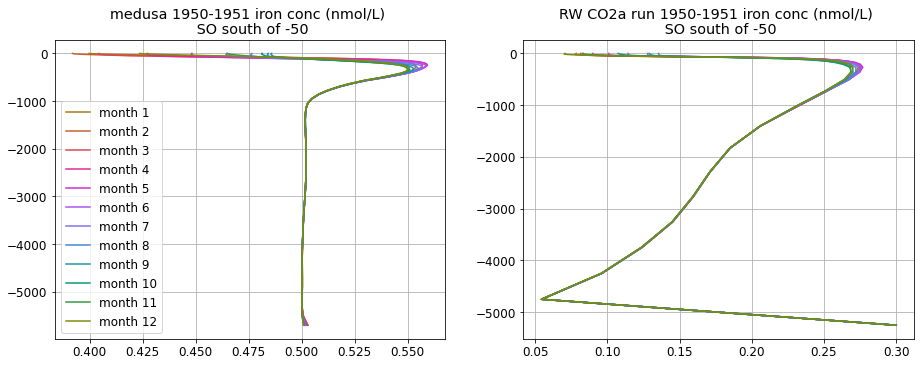

In [15]:
med_pd


fig, axs = plt.subplots(1,2, figsize=(14*fact, 5*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()

for i in range(0,12):
    
    tcm = cm.phase
    axs[0].plot(med_pd[i,:], -MED.deptht, color = tcm(1.*(i)/12), label = f'month {i+1}')
    

for i in range(0,12):
    
    tcm = cm.phase
    axs[1].plot(RW_pd[i,:], -RW_CO2a.deptht, color = tcm(1.*(i)/12))
    
axs[0].legend(loc = 'best')
                
axs[0].set_title('medusa 1950-1951 iron conc (nmol/L) \n SO south of -50')
axs[1].set_title('RW CO2a run 1950-1951 iron conc (nmol/L) \n SO south of -50')
                
for i in range(0,2):
    axs[i].grid()

                
                

In [16]:
#https://geotraces.webodv.awi.de/IDP2021_v2%3EGEOTRACES_IDP2021_Seawater_Discrete_Sample_Data_v2/service/DataExtraction
extract = False
if extract:
    import xarray as xr
    import numpy as np
    
    ir = xr.open_dataset('./data/IDP2021_v2_GEOTRACES_IDP2021_Seawater_Discrete_Sample_Data_v2_3OgY81N3.nc')
    mask = (ir['latitude'] <= -50) 
    
    # Use the mask to subset the Dataset
    # Since 'latitude' dimension is 'N_STATIONS', it automatically aligns with 'FER' dimension
    ir_so = ir.where(mask, drop=True)

    isvalid = np.zeros(513)
    for i in range(0,513):

        #print(np.nanmax(ir_so.Fe_D_CONC_BOTTLE[i,:]))
        is_all_nans = ir_so.Fe_D_CONC_BOTTLE[i,:].isnull().all()
        #print(is_all_nans.values)
        if (is_all_nans.values == False):
            isvalid[i] = 5
    #     print(isvalid[i])
    #     print()
        if i%100 == 0:
            print(i)

    ir_so = ir_so.assign(isvalid=('N_STATIONS', isvalid))

    mask2 = ir_so['isvalid'] > 0
    ir_soval = ir_so.where(mask2, drop=True)
    
    ir_soval.to_netcdf('./data/IDP2021_v2_GEOTRACES_IDP2021_SO_valid_only.nc')

In [17]:

ir = xr.open_dataset('./data/IDP2021_v2_GEOTRACES_IDP2021_SO_valid_only.nc')

In [18]:
lat_broad = np.zeros([204,698])
lon_broad = np.zeros([204,698])

for i in range(0,204):
    lat_broad[i] = ir.latitude[i]
    lon_broad[i] = ir.longitude[i]
    
ir = ir.assign(lat_broad= (('N_STATIONS', 'N_SAMPLES'), lat_broad))   
ir = ir.assign(lon_broad= (('N_STATIONS', 'N_SAMPLES'), lon_broad))   

In [19]:
ir_surf = ir.where(ir.DEPTH <20, drop=True)
ir_200 = ir.where(((ir.DEPTH >180) & (ir.DEPTH <220)), drop=True)
ir_depth = ir.where(((ir.DEPTH <1200) & (ir.DEPTH >800)), drop=True)
ir_vdepth = ir.where(((ir.DEPTH >1600) & (ir.DEPTH < 2400)), drop=True)



In [20]:
surfval = (np.nanmedian(ir_surf.Fe_D_CONC_BOTTLE.values))
val200 = (np.nanmedian(ir_200.Fe_D_CONC_BOTTLE.values))
dval = (np.nanmedian(ir_depth.Fe_D_CONC_BOTTLE.values))
vdval = (np.nanmedian(ir_vdepth.Fe_D_CONC_BOTTLE.values))

Fesurfgrad = (val200-surfval)/190
Fe1000minsurf = dval-surfval
Fe2000minsurf = vdval-surfval

print(f'surface (0-20m) median is {surfval}, median at 180-220m is {val200}')
print(f'median at 800-1200m is {dval}, at 1600-2400m is {vdval}')
print(f'surface 200m gradient is {Fesurfgrad}')
print(f'1000-surface is {Fe1000minsurf}')
print(f'2000-surface is {Fe2000minsurf}')

surface (0-20m) median is 0.14434000849723816, median at 180-220m is 0.24459899961948395
median at 800-1200m is 0.37073200941085815, at 1600-2400m is 0.4292680025100708
surface 200m gradient is 0.0005276789006433989
1000-surface is 0.22639200091362
2000-surface is 0.28492799401283264


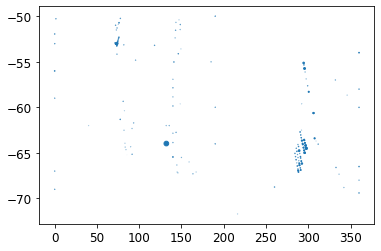

In [21]:
plt.scatter(ir_surf.lon_broad,ir_surf.lat_broad,ir_surf.Fe_D_CONC_BOTTLE)

In [22]:
def scatter_southern(fig, ax1, lons, lats, tdat, tvmin, dotsize,
                  tvmax, tticks, northex = -50, fs = 12, 
                  tit = '', cbarlab = '', tcmap = 'viridis', lm = True, cbr = True):
   
    ax1.set_extent([-180, 180, -80, northex], ccrs.PlateCarree())
    #make that circle
    theta = np.linspace(0, 2*np.pi, 100)
    center, radius = [0.5, 0.5], 0.5
    verts = np.vstack([np.sin(theta), np.cos(theta)]).T
    circle = mpath.Path(verts * radius + center)
    ax1.set_boundary(circle, transform=ax1.transAxes)
    #lons = nav_lon[0:37,:]; lats = nav_lat[0:37,:]; 
    mesh = ax1.scatter(lons, lats, s = dotsize, c = tdat, cmap = tcmap, vmin = tvmin, vmax = tvmax, alpha = 0.6,
                     transform=ccrs.PlateCarree())
    ax1.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '110m', 
                                                 edgecolor='face', facecolor='k'))
    ax1.set_title(tit, fontsize = fs)
    cb = 0
    if cbr:
        cb = fig.colorbar(mesh, ax = ax1, orientation = 'horizontal',
                     pad = 0.06, fraction = 0.045, shrink = 0.9)
        cb.set_label(label=cbarlab,fontsize = fs)
        cb.set_ticks(tticks, fontsize = 105)
        cb.ax.tick_params(labelsize=16)
    return cb



Text(0.2, 0.0, 'made in scratch/BOE-SOcarbon/iron-cycle.ipynb, data: https://geotraces.webodv.awi.de/IDP2021_v2')

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


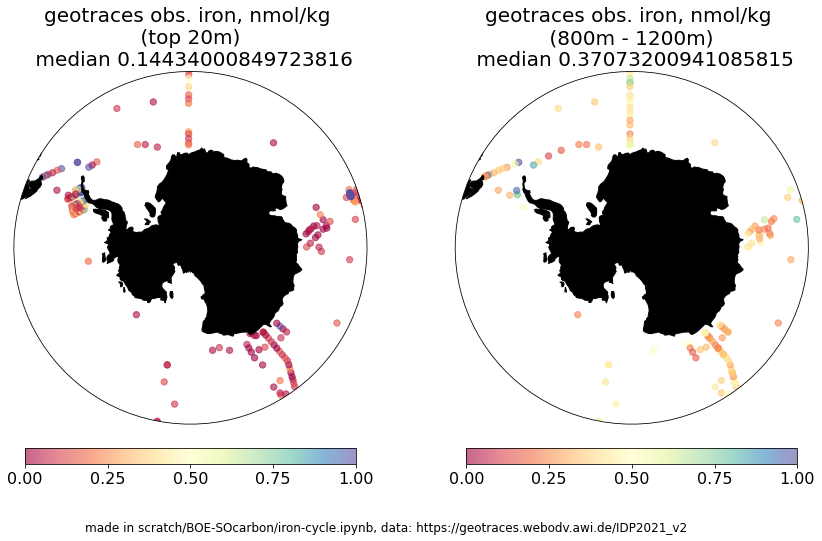

In [23]:
fact = 0.5
tfig = plt.figure(figsize=[14.5*2*fact, 14.5*fact])
ax1 = tfig.add_subplot(1, 2, 1, projection=ccrs.Orthographic(0, -90))
lons = ir_surf.lon_broad.values
lats = ir_surf.lat_broad.values
tdat = ir_surf.Fe_D_CONC_BOTTLE.values
tvmin = 0
tvmax = 1
tticks = np.arange(0,1.25,0.25)
dotsize = 40
scatter_southern(fig, ax1, lons, lats, tdat, tvmin, dotsize,
                  tvmax, tticks, northex = -50, fs = 20, 
                  tit = f'geotraces obs. iron, nmol/kg \n (top 20m) \n median {np.nanmedian(ir_surf.Fe_D_CONC_BOTTLE.values)}', \
                 cbarlab = '', tcmap = 'Spectral', lm = True, cbr = True)


ax1 = tfig.add_subplot(1, 2, 2, projection=ccrs.Orthographic(0, -90))
lons = ir_depth.lon_broad.values
lats = ir_depth.lat_broad.values
tdat = ir_depth.Fe_D_CONC_BOTTLE.values
tvmin = 0
tvmax = 1
tticks = np.arange(0,1.25,0.25)
dotsize = 40
scatter_southern(fig, ax1, lons, lats, tdat, tvmin, dotsize,
                  tvmax, tticks, northex = -50, fs = 20, 
                  tit = f'geotraces obs. iron, nmol/kg \n (800m - 1200m) \n median {np.nanmedian(ir_depth.Fe_D_CONC_BOTTLE.values)}', \
                 cbarlab = '', tcmap = 'Spectral', lm = True, cbr = True)

tfig.text(0.2,0.0,\
        s ='made in scratch/BOE-SOcarbon/iron-cycle.ipynb, data: https://geotraces.webodv.awi.de/IDP2021_v2')

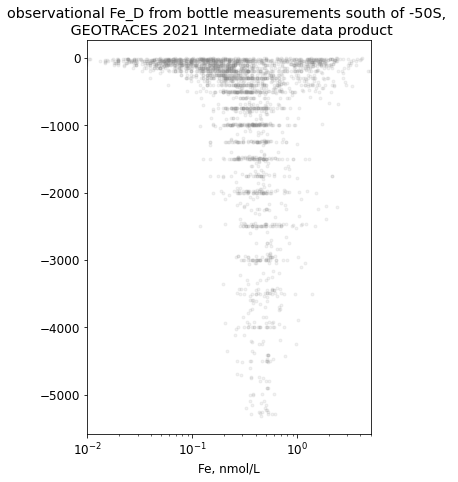

In [33]:
import matplotlib
plt.figure(figsize=[14.5*0.7*fact, 14.5*fact])
n = 204
for i in range(0,n):
    
    tcm = matplotlib.cm.get_cmap('Spectral')
    plt.plot(ir.Fe_D_CONC_BOTTLE[i,:],-ir.DEPTH[i,:], color  = 'grey', linestyle = 'none', marker = '.', alpha = 0.1)
    
    plt.xlim([0,5])
    plt.xscale('log')
    plt.xlim([0.01,5])
    plt.xlabel('Fe, nmol/L')
    plt.title('observational Fe_D from bottle measurements south of -50S, \n GEOTRACES 2021 Intermediate data product')

### biology